In [1]:
import pandas as pd
import numpy as np

## Setting the Model & Vectorizer
a logistic regression model for it's light weight,
TF-IDF for simple but powerful word vectorization


In [2]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Get Training Data
---
using the rule-based-labeled data for training, combined with human-classified samples for optimal training conditions under limited resources.
Rule-based classified data and human-classified data are in a ratio of approx. 2.25 to rule-based labeled data.

## Rule-Based Category Labels
using a keyword method to create a rule-based category labeled subset of the data
the goal is to train a model (logistic regression) to fill the rest of the data samples on what it learned

In [3]:
categories = {
    "Work" : ["meeting","report","boss","manager","product","client"],
    "Personal" : ["flight","shopping","concert","tickets","wedding","birthday","graduation","celebration","family"],
    "School" : ["study","chapter","physics","submit","math","quiz","test","notebook"],
    "Health" : ["doctor","dentist","nurse","therapist","optometrist","psychologist","prescriptions","medical"],
    "Household" : ["buy","table","banana","apple","dishes","clean","plumber","electrician"]  
}

In [ ]:
def label_to_category(data, categories, n):
    for i in range(n):
        task = data['Task'][i].lower()
        for category, keywords in categories.items():
            for keyword in keywords:
                if keyword in task:
                    data.at[i, 'Category'] = category
                    break
            else:
                continue
            break

In [6]:
df = pd.read_csv('../NER_Data.csv')
label_to_category(df, categories, 1500)
df_category_labeled = df[df['Category'].notna()]
df_category_unlabeled = df[df['Category'].isna()]
print(df_category_labeled.Category.value_counts())
print("sum trusted samples: ", np.sum(df_category_labeled.Category.value_counts().values))

Category
Work         250
School       183
Personal     161
Household    151
Health        57
Name: count, dtype: int64
sum trusted samples:  802


## Importing Human-Classified Samples for Testing

In [7]:
HC_df = pd.read_csv('HumanCategoryClassified.csv')
HC_df = HC_df[HC_df['sentiment'].notna()]
len(HC_df)

352

In [8]:
HC_df = HC_df[['Task', 'Label','sentiment']]
HC_df.rename(columns={'sentiment': 'Category'}, inplace=True)
HC_df['Category'].value_counts()

Category
Work         133
Personal     120
Household     40
School        38
Health        21
Name: count, dtype: int64

In [9]:
HC_df.head()

,Task,Label,Category
0,tomorrow i have to send the document for the a...,"B-Date,O,O,O,B-Task,O,B-Task,I-Task,O,B-Task,I...",Work
1,wrap up Gal's medical prescriptions on june 21...,"B-Task,I-Task,I-Task,I-Task,I-Task,O,B-Date,I-...",Health
2,design Daniel's party gift before march 11th,"B-Task,I-Task,I-Task,I-Task,O,B-Date,I-Date",Personal
3,look into the monthly expense summary by the d...,"B-Task,I-Task,O,B-Task,I-Task,I-Task,O,O,O,O,B...",Work
4,update a doctor appointment on feb 16th around...,"B-Task,O,B-Task,I-Task,O,B-Date,I-Date,O,B-Time",Health


In [10]:
df_category_labeled.head()

,Task,Label,Category
0,don't forget to complete the movie tickets by ...,"O,O,O,B-Task,O,B-Task,I-Task,O,B-Date,O,B-Time",Personal
2,go over my dry cleaning in three days,"B-Task,I-Task,O,B-Task,I-Task,B-Date,I-Date,I-...",Household
4,schedule trip tickets today at 6:25 PM.,"B-Task,I-Task,I-Task,B-Date,O,B-Time,I-Time",Personal
8,schedule the new table made by Gal until Frida...,"B-Task,O,B-Task,I-Task,O,O,O,O,B-Date,O,B-Time",Household
11,study the project report by 10a.m. on Thursday,"B-Task,O,B-Task,I-Task,O,B-Time,O,B-Date",Work


In [11]:
from sklearn.model_selection import train_test_split
data = pd.concat([df_category_labeled, HC_df], axis=0)
X = vectorizer.fit_transform(data['Task'])
X_train, X_test, y_train, y_test = train_test_split(X, data['Category'], test_size=0.2, random_state=42)

## Evaluation
evaluate how well the model will perform when it actually trains

F1 Score = 2*(Precision*Recall)/(Precision+Recall)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
cv_results = cross_val_score(model, X_train, y_train, cv=sfk, scoring='f1_micro')

cv_results, cv_results.mean() # F1 score

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

(array([0.85945946, 0.85945946, 0.88108108, 0.83695652, 0.84782609]),
 0.8569565217391304)

## Training
after seeing good accuracy (an average F1 score of approx. 84% in validation), we'll train the model on this data

In [13]:
model.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', multi_class='multinomial')

## Feature Importance
after training the model, let's examine the most important features associated with each class

In [ ]:
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_  # shape: (n_classes, n_features)

def top_features(weights, feature_names, class_index, top_n=10): # For a specific class
    top_indices = np.argsort(weights[class_index])[::-1][:top_n]  # top n weights
    top_features = [(feature_names[i], weights[class_index][i]) for i in top_indices]
    top_features_list = []
    for feature, weight in top_features:
        print(f"{feature}: {weight:.4f}")
        top_features_list.append(f"{feature}: {weight:.4f}")
    return top_features_list

class_indices={
    0 : "Health",
    1 : "Household",
    2 : "Personal",
    3: "School",
    4 : "Work"
}

for item in class_indices:
    print(class_indices[item]+":\n-------")
    top_features(weights, feature_names, item, 5)



Health:
-------
appointment: 4.1663
prescriptions: 3.9582
medical: 3.9582
nurse: 2.8217
inspect: 2.6316
Household:
-------
table: 3.7615
buy: 2.6200
clean: 2.5641
dry: 2.1724
cleaning: 2.1724
Personal:
-------
tickets: 3.7840
birthday: 2.3567
wedding: 2.1042
graduation: 1.6571
shopping: 1.6315
School:
-------
submit: 3.3098
physics: 3.2206
study: 2.6796
test: 2.6404
chapter: 2.4620
Work:
-------
report: 5.0223
meeting: 3.3034
presentation: 2.1097
client: 2.0507
boss: 1.9521


## Visualize Important Features For Each Class
for interpretation of what the model has learned

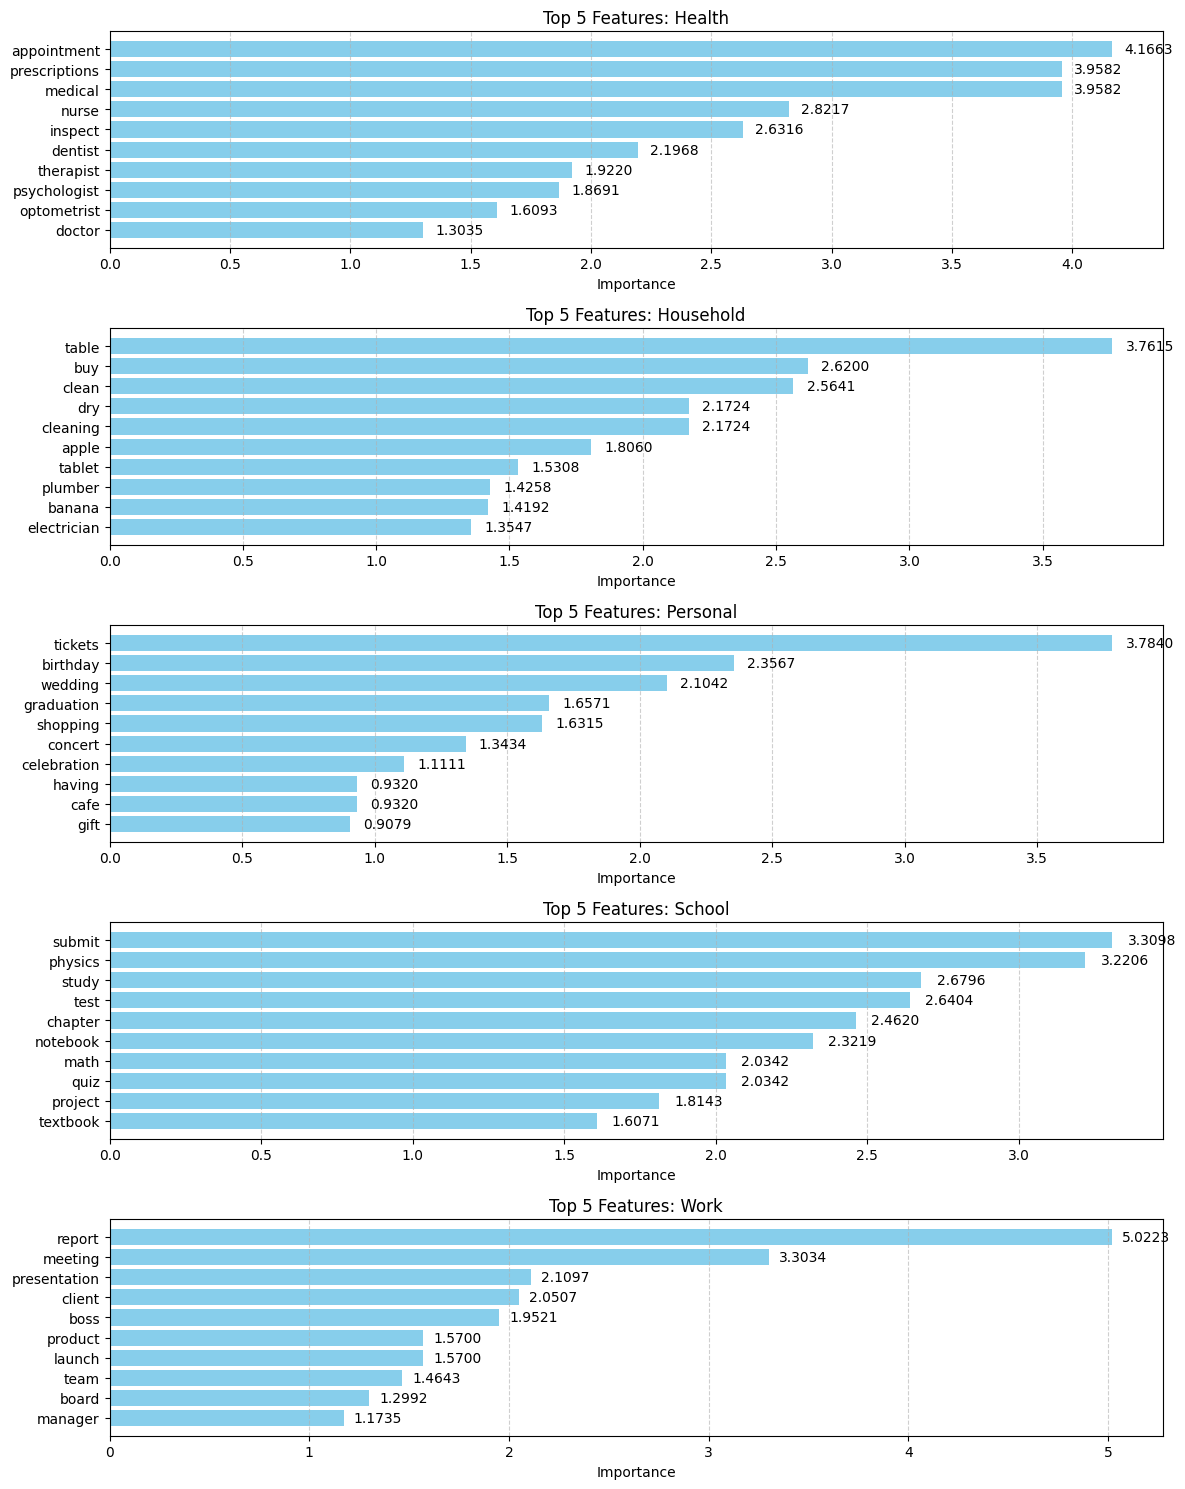

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(12, 15))
plt.subplots_adjust(hspace=0.5)

class_names = ['Health', 'Household', 'Personal', 'School', 'Work']

# Plot for each class
for i, class_name in enumerate(class_names):
    # Get top features for this class
    class_idx = i  # Class index
    top_n = 10  # Number of top features to show
    
    # Get top indices for this class
    top_indices = np.argsort(weights[class_idx])[::-1][:top_n]
    
    # Get feature names and weights
    features = [feature_names[idx] for idx in top_indices]
    feature_weights = [weights[class_idx][idx] for idx in top_indices]
    
    # Reverse lists to show highest weights at the top
    features.reverse()
    feature_weights.reverse()
    
    # Create horizontal bar chart
    bars = axes[i].barh(features, feature_weights, color='skyblue')
    
    # Add weight labels to the right of each bar
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 0.05
        axes[i].text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
                    va='center')
    
    # Set title and labels
    axes[i].set_title(f'Top 5 Features: {class_name}')
    axes[i].set_xlabel('Importance')
    axes[i].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Testing with Unseen Data

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      Health       0.88      1.00      0.94        15
   Household       0.77      0.83      0.80        36
    Personal       0.80      0.88      0.83        49
      School       0.85      0.89      0.87        46
        Work       0.97      0.84      0.90        85

    accuracy                           0.87       231
   macro avg       0.85      0.89      0.87       231
weighted avg       0.87      0.87      0.87       231

accuracy:  0.8658008658008658


## Saving the Model and Vectorizer
to be able to classify the category of a task in the main app

In [18]:
import pickle

# Save the trained model
with open('CategoryClassifier_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the TF-IDF vectorizer
with open('CategoryClassifier_Vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [19]:
with open('CategoryClassifier_Model.pkl', 'rb') as f:
    CatClassifier = pickle.load(f)
with open('CategoryClassifier_Vectorizer.pkl', 'rb') as f:
    CatVectorizer = pickle.load(f)

text = "pick up Dana's medical prescriptions by Monday"
vectorized = CatVectorizer.transform([text])
prediction = CatClassifier.predict(vectorized)
print(prediction)

['Health']
